<a href="https://colab.research.google.com/github/gjrkdgh0772/Python-Review/blob/master/lec18_ARIMA_daily_seoul_air_cond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lec18. ARIMA - 공공데이터포털
* daily_seoul_air_cond

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt


import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pkg/02.daily_seoul_air_cond_2020.04.txt', parse_dates=['측정일시']) 

In [ ]:
df.columns   # '측정일시' '측정소명' '초미세먼지(㎍/㎥)',

Index(['측정일시', '권역코드', '권역명', '측정소코드', '측정소명', '미세먼지 1시간(㎍/㎥)',
       '미세먼지 24시간(㎍/㎥)', '초미세먼지(㎍/㎥)', '오존(ppm)', '이산화질소농도(ppm)',
       '일산화탄소농도(ppm)', '아황산가스농도(ppm)'],
      dtype='object')

In [ ]:
print(df.shape)
print(df.info())
df.head()


(18000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   측정일시            18000 non-null  datetime64[ns]
 1   권역코드            18000 non-null  int64         
 2   권역명             18000 non-null  object        
 3   측정소코드           18000 non-null  int64         
 4   측정소명            18000 non-null  object        
 5   미세먼지 1시간(㎍/㎥)   18000 non-null  int64         
 6   미세먼지 24시간(㎍/㎥)  18000 non-null  int64         
 7   초미세먼지(㎍/㎥)      18000 non-null  int64         
 8   오존(ppm)         18000 non-null  float64       
 9   이산화질소농도(ppm)    18000 non-null  float64       
 10  일산화탄소농도(ppm)    18000 non-null  float64       
 11  아황산가스농도(ppm)    18000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 1.6+ MB
None


,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,2020-04-30 23:00:00,100,도심권,111123,종로구,40,43,21,0.036,0.008,0.3,0.003
1,2020-04-30 23:00:00,100,도심권,111121,중구,31,41,22,0.037,0.010,0.3,0.003
2,2020-04-30 23:00:00,100,도심권,111131,용산구,41,40,21,0.035,0.011,0.3,0.002
3,2020-04-30 23:00:00,101,서북권,111181,은평구,32,37,20,0.053,0.005,0.3,0.003
4,2020-04-30 23:00:00,101,서북권,111201,마포구,34,34,21,0.043,0.009,0.3,0.002


In [ ]:
df = df[['측정일시', '측정소명','미세먼지 1시간(㎍/㎥)']].copy()
df.head(2)

,측정일시,측정소명,미세먼지 1시간(㎍/㎥)
0,2020-04-30 23:00:00,종로구,40
1,2020-04-30 23:00:00,중구,31


# EDA

측정소명
강남구     37.991667
강동구     43.100000
강북구     46.843056
강서구     44.644444
관악구     42.352778
광진구     43.195833
구로구     46.881944
금천구     39.061111
노원구     45.326389
도봉구     41.506944
동대문구    38.659722
동작구     48.633333
마포구     40.162500
서대문구    48.919444
서초구     44.475000
성동구     39.758333
성북구     44.994444
송파구     42.641667
양천구     44.781944
영등포구    39.716667
용산구     44.798611
은평구     45.851389
종로구     41.561111
중구      38.544444
중랑구     42.206944
Name: 미세먼지 1시간(㎍/㎥), dtype: float64


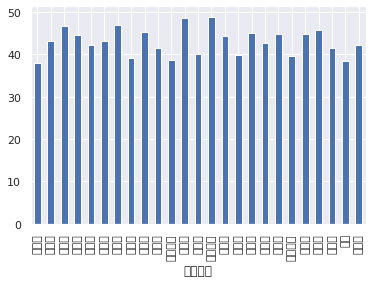

In [ ]:
plt.rcParams['font.family']= 'Malgun Gothic'
print(df.groupby(by="측정소명")['미세먼지 1시간(㎍/㎥)'].mean())
df.groupby(by="측정소명")['미세먼지 1시간(㎍/㎥)'].mean().plot(kind='bar')
plt.show()

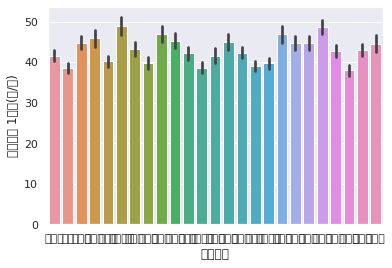

In [ ]:
sns.barplot(data=df, x="측정소명", y='미세먼지 1시간(㎍/㎥)')
plt.show()

## ARIAMA 모델을 위한 데이터셋 준비

### (방법1) df[조건].copy()

In [ ]:
dfg = df[df['측정소명']=='중구'][['측정일시', '미세먼지 1시간(㎍/㎥)']].copy()
dfs = df[df['측정소명']=='서대문구'][['측정일시', '미세먼지 1시간(㎍/㎥)']].copy()

In [ ]:
dfg.head(2)

,측정일시,미세먼지 1시간(㎍/㎥)
1,2020-04-30 23:00:00,31
26,2020-04-30 22:00:00,35


### (방법2) 피벗

In [ ]:
df.groupby(by=["측정일시","측정소명"])['미세먼지 1시간(㎍/㎥)'].mean()

측정일시                 측정소명
2020-04-01 00:00:00  강남구     44.0
                     강동구     51.0
                     강북구     56.0
                     강서구     52.0
                     관악구     45.0
                             ... 
2020-04-30 23:00:00  용산구     41.0
                     은평구     32.0
                     종로구     40.0
                     중구      31.0
                     중랑구     40.0
Name: 미세먼지 1시간(㎍/㎥), Length: 18000, dtype: float64

In [ ]:
pvdf = df.pivot_table(values='미세먼지 1시간(㎍/㎥)',
                    index="측정일시",
                    columns="측정소명",
                    aggfunc="mean")
pvdf.head(3)     

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
측정일시,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-01 00:00:00,44,51,56,52,45,54,62,39,56,57,44,51,48,55,55,45,48,51,52,46,58,54,46,44,51
2020-04-01 01:00:00,49,56,69,51,52,54,64,43,73,64,46,57,52,61,59,46,55,55,52,49,59,55,47,44,53
2020-04-01 02:00:00,50,55,90,59,57,61,79,52,91,82,51,68,51,61,68,52,90,55,60,51,60,52,53,47,64


In [ ]:
pvdf[["중구",'서대문구']].head()

측정소명,중구,서대문구
측정일시,,
2020-04-01 00:00:00,44,55
2020-04-01 01:00:00,44,61
2020-04-01 02:00:00,47,61
2020-04-01 03:00:00,56,88
2020-04-01 04:00:00,71,83


No handles with labels found to put in legend.


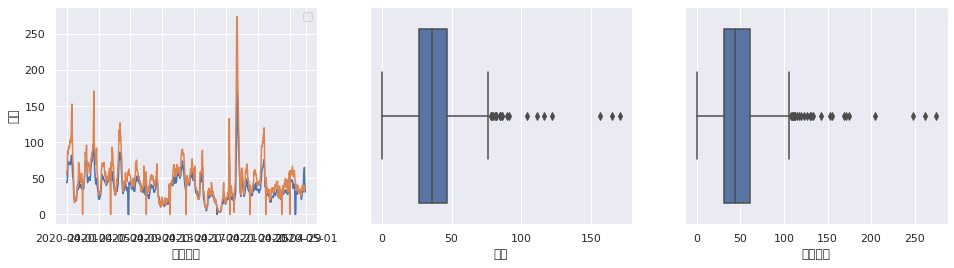

In [ ]:
f, axs=plt.subplots(1,3, figsize=(16,4))
sns.lineplot(x=pvdf.index, y=pvdf['중구']    , ax=axs[0])
sns.lineplot(x=pvdf.index, y=pvdf['서대문구'], ax=axs[0])
axs[0].legend()

sns.boxplot(pvdf['중구']   , ax=axs[1])
sns.boxplot(pvdf['서대문구'], ax=axs[2])
plt.show()


# 차분 계산

In [ ]:
pvdf = pvdf['중구'].copy()

### ACF PACF plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima.model import ARIMA  #statsmodel version 1.12  over
from statsmodels.tsa.arima_model import ARIMA  #statsmodel version 1.10.2  under

### I : 1

In [ ]:
# pvdf = pvdf.dropna()
# pvdf.head()

### AR : 2, MA:2

* AR모형 - 2차수~ 3차수
* MA모형 - 2차수
* I : 1~2차분

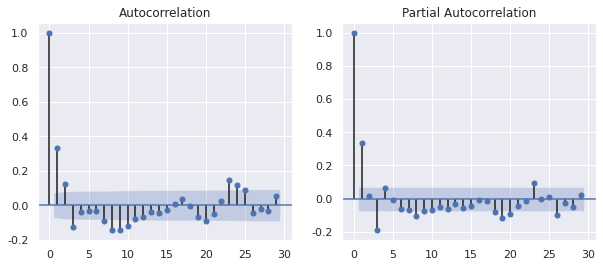

In [ ]:
p, axes = plt.subplots(1,2,figsize=(10,4))
plot_acf(pvdf.diff(1).dropna(), ax=axes[0])
plot_pacf(pvdf.diff(1).dropna(), ax=axes[1])
plt.show()

# 모델학습 & 평가

In [ ]:
model = ARIMA(pvdf, order=(1,1,2), freq='H')
fit_res = model.fit(trend='nc')
print(fit_res.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.중구   No. Observations:                  719
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2337.423
Method:                       css-mle   S.D. of innovations              6.245
Date:                Tue, 08 Feb 2022   AIC                           4682.845
Time:                        01:03:36   BIC                           4701.157
Sample:                    04-01-2020   HQIC                          4689.915
                         - 04-30-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.중구    -0.3447      0.126     -2.744      0.006      -0.591      -0.099
ma.L1.D.중구     0.6959      0.119      5.871      0.000       0.464       0.928
ma.L2.D.중구     0.3384      0.042      8.017      0.0

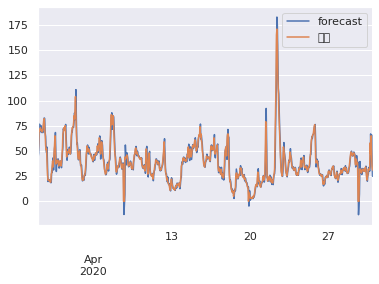

In [ ]:
fit_res.plot_predict(dynamic=False)  # in-sample lagged values are used for prediction
plt.show()

* ‘linear’ : Linear prediction in terms of the differenced endogenous variables.
* ‘levels’ : Predict the levels of the original endogenous variables.

In [ ]:
# train = pvdf['중구'].iloc[:-5] 
# test  = pvdf['중구'].iloc[-5:]

model = ARIMA(pvdf, order=(1,1,2), freq='H')
fit_res = model.fit(trend='nc')
# pred = fit_res.forecast(steps=3)  # 4,145.1
pred = fit_res.predict(start=1, end=30, typ='levels', dynamic=False)

print(pred[:5])
print(pvdf.dropna()[1:6])

2020-04-01 01:00:00    44.000000
2020-04-01 02:00:00    44.000000
2020-04-01 03:00:00    47.986721
2020-04-01 04:00:00    59.340968
2020-04-01 05:00:00    76.556699
Freq: H, dtype: float64
측정일시
2020-04-01 01:00:00    44
2020-04-01 02:00:00    47
2020-04-01 03:00:00    56
2020-04-01 04:00:00    71
2020-04-01 05:00:00    70
Name: 중구, dtype: int64
